# Rendering Basics

In [ ]:
import open3d
import os
import pathlib
import torch
import matplotlib.pyplot as plt

# Util function for loading meshes
from pytorch3d.io import load_objs_as_meshes

# Data structures and functions for rendering
from pytorch3d.renderer import look_at_view_transform, FoVPerspectiveCameras, PerspectiveCameras, PointLights, Materials, RasterizationSettings, MeshRenderer, MeshRasterizer

from pytorch3d.renderer.mesh.shader import HardPhongShader


def delete_from_disk(path: pathlib.Path):
    if path.is_file() or path.is_symlink():
        path.unlink()
        return
    for p in path.iterdir():
        delete_from_disk(p)
    path.rmdir()


## Setup
mesh_file = "./spot/spot.obj"
device = torch.device("cuda")
out_path = os.path.abspath("./out")

if os.path.isdir(out_path):
    delete_from_disk(pathlib.Path(out_path))
os.mkdir(out_path)

## Load meshe and visualize it using Open3D
print("Visualizing mesh using Open3D")
mesh = open3d.io.read_triangle_mesh(mesh_file, enable_post_processing=True)
open3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True, mesh_show_back_face=True)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Visualizing mesh using Open3D


In [29]:
## Load meshe and visualize it using PyTorch3D
mesh = load_objs_as_meshes([mesh_file], device=device)

R, T = look_at_view_transform(2.7, 0, 180)
cameras = PerspectiveCameras(device=device, R=R, T=T)
lights = PointLights(device=device, location=[[0.0, 0.0, -3.0]])

raster_settings = RasterizationSettings(image_size=512, blur_radius=0.0, faces_per_pixel=1)
renderer = MeshRenderer(rasterizer=MeshRasterizer(cameras=cameras, raster_settings=raster_settings), shader=HardPhongShader(device=device, cameras=cameras, lights=lights))

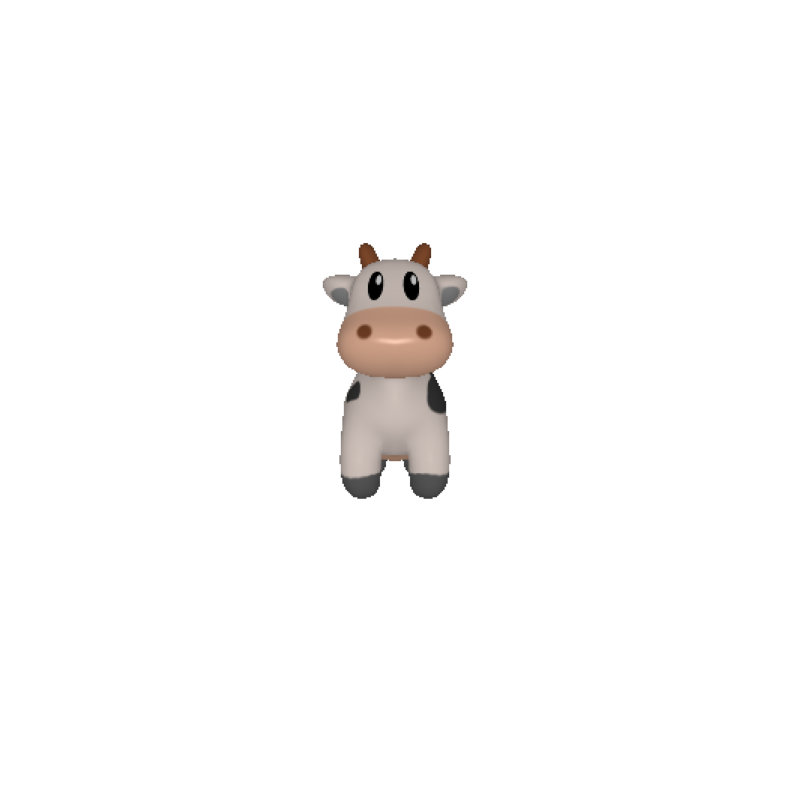

In [31]:
R, T = look_at_view_transform(2.7, 0, 180)
cameras = PerspectiveCameras(device=device, R=R, T=T)
lights = PointLights(device=device, location=[[0.0, 0.0, -3.0]])

images = renderer(mesh, lights=lights, cameras=cameras)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off")
plt.savefig("./out/front.png")

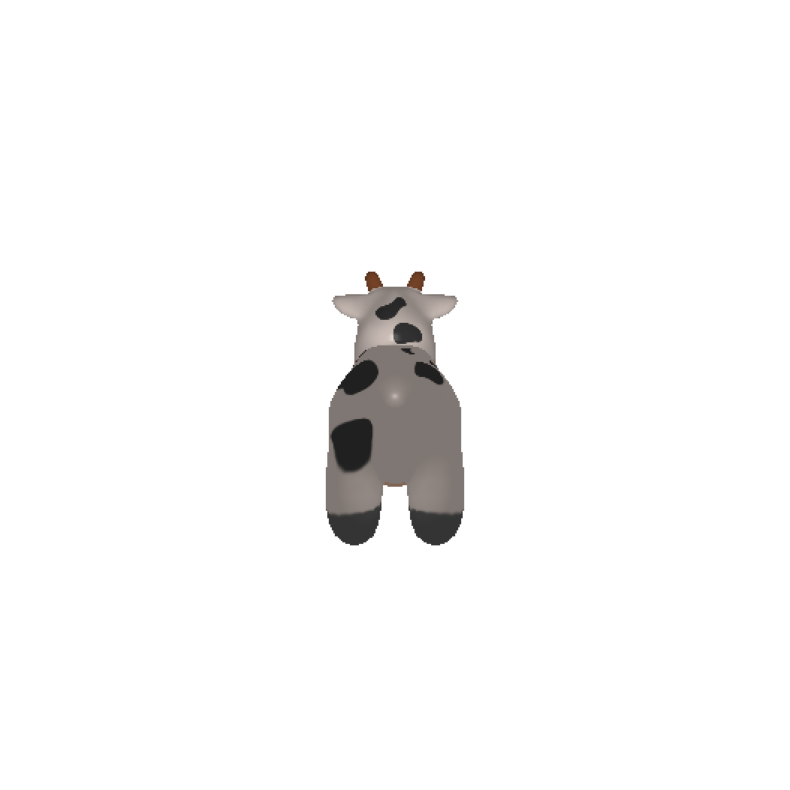

In [37]:
R, T = look_at_view_transform(2.7, 0, 0)
cameras = PerspectiveCameras(device=device, R=R, T=T)
lights.location = torch.tensor([0.0, 0.0, 1.0], device=device)[None]

images = renderer(mesh, cameras=cameras, lights=lights)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off")
plt.savefig("./out/back.png")

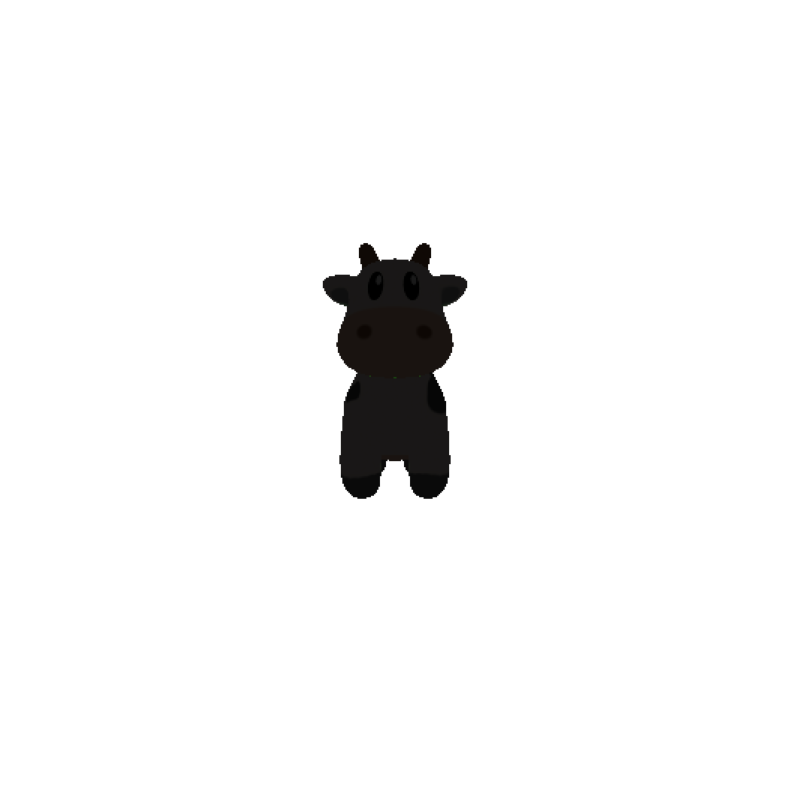

In [ ]:
R, T = look_at_view_transform(2.7, 0, 180)
cameras = PerspectiveCameras(device=device, R=R, T=T)
lights.location = torch.tensor([0.0, 0.0, 1.0], device=device)[None]

materials = Materials(
    device=device,
    specular_color=[[0.0, 1.0, 0.0]],
    shininess=10.0,
    # ambient_color=((0.01, 0.01, 0.01),),
    ambient_color=((0.2, 0.2, 0.2),),
)

images = renderer(mesh, cameras=cameras, lights=lights, materials=materials)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off")
plt.savefig("./out/dark.png")

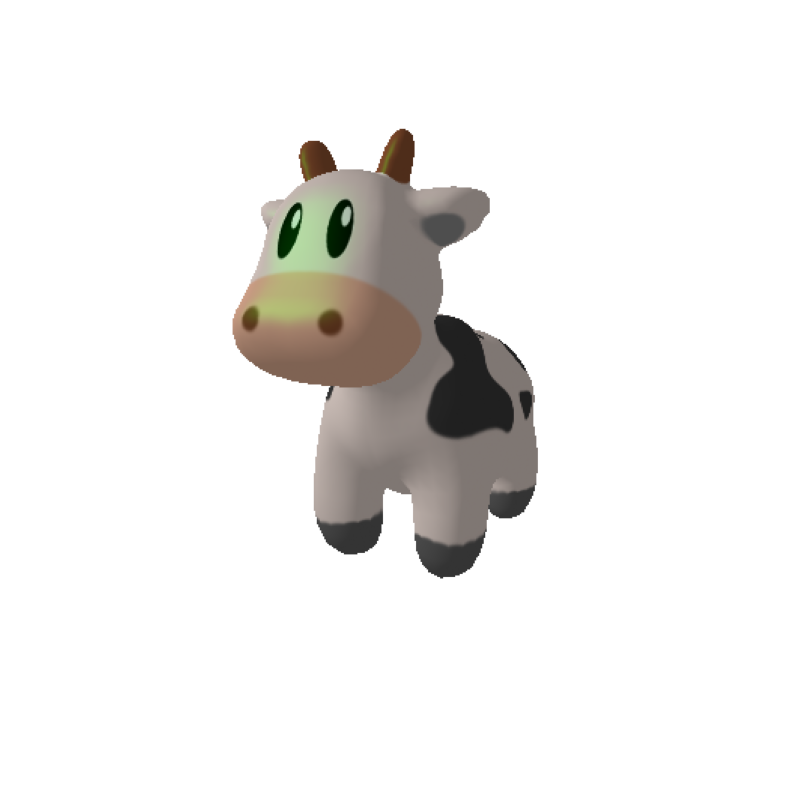

In [ ]:
R, T = look_at_view_transform(dist=2.7, elev=10, azim=-150)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)
lights.location = torch.tensor([[2.0, 2.0, -2.0]], device=device)

# Change specular color to green and change material shininess
materials = Materials(device=device, specular_color=[[0.0, 1.0, 0.0]], shininess=10.0)

images = renderer(mesh, cameras=cameras, lights=lights, materials=materials)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off")
plt.savefig("./out/green.png")

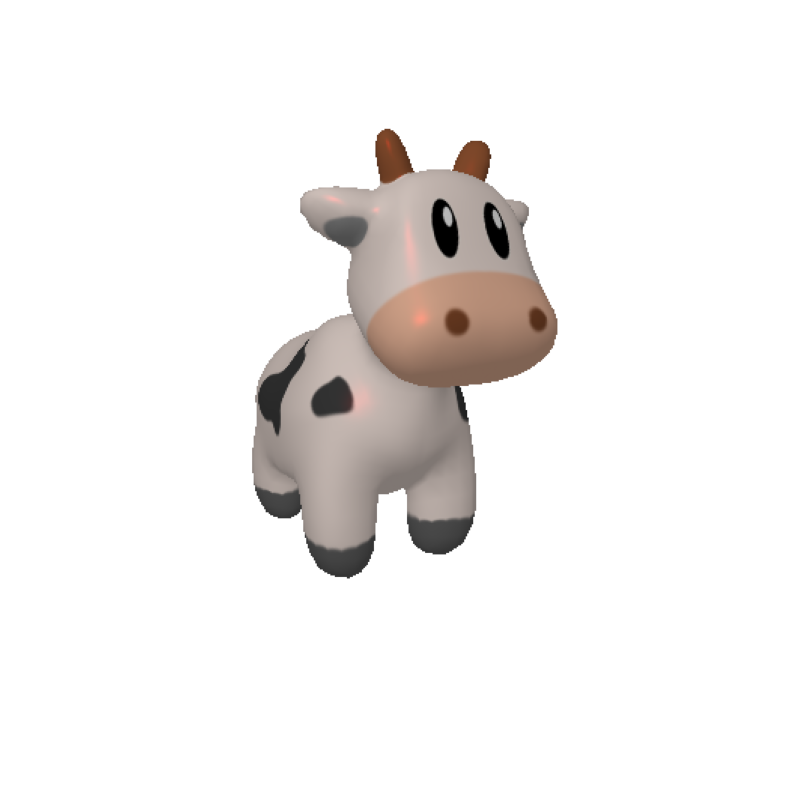

In [49]:
R, T = look_at_view_transform(dist=2.7, elev=10, azim=150)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)
lights.location = torch.tensor([[2.0, 2.0, -2.0]], device=device)

# Change specular color to red and change material shininess
materials = Materials(device=device, specular_color=[[1.0, 0.0, 0.0]], shininess=20.0)

images = renderer(mesh, lights=lights, materials=materials, cameras=cameras)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off")
plt.savefig("./out/red.png")

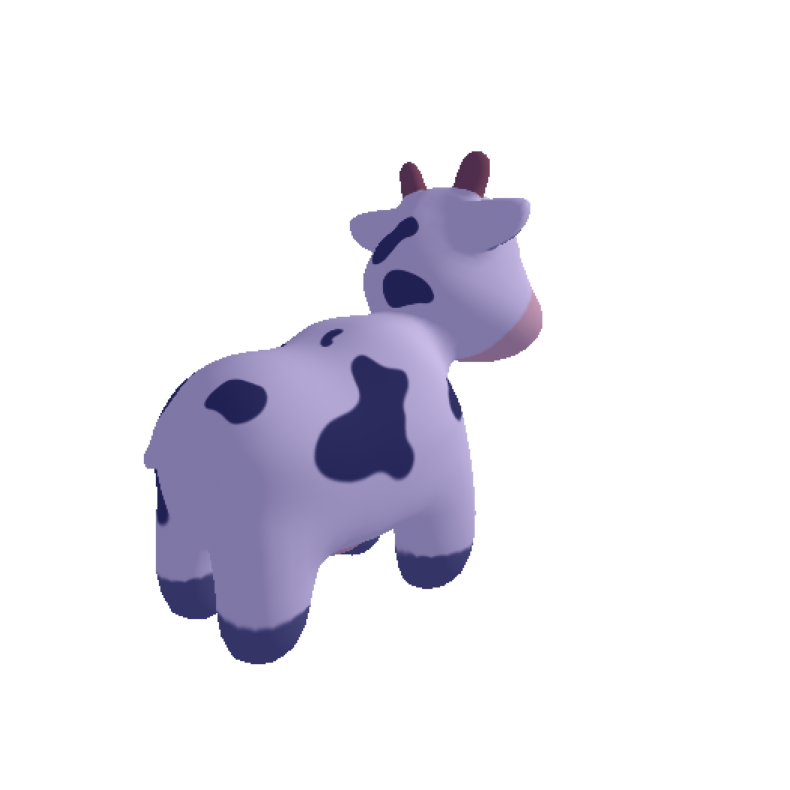

In [45]:
R, T = look_at_view_transform(dist=2.7, elev=10, azim=45)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)
lights.location = torch.tensor([[2.0, 2.0, -2.0]], device=device)

# Change specular color to blue and change material shininess
materials = Materials(device=device, specular_color=[[0.0, 0.0, 1.0]], shininess=0.0)

# Re render the mesh, passing in keyword arguments for the modified components.
images = renderer(mesh, lights=lights, materials=materials, cameras=cameras)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.axis("off")
plt.savefig("./out/blue.png")